# Module 4: Neural Networks

* At the end of module 2, you implemented a basic neural net with one unit. In this module, we explain what a full neural net is and how to implement it in Tensorflow 2.0

## A Single Neuron

* An artificial neuron is a mathematical function that computes a weighted sum of its inputs and then applies some transformation to that sum. That transformation is known as the activation function.

![alt text](figures/neuron.png)

* In Module 2, the transformation was a `cos()` function, but that is rarely used in neural nets. The Figure above shows some common transformations.

* Neural networks get their representational power from _nonlinear_ transformations, such as $tanh$ and $relu$ above.

In [36]:
import numpy as np 

# simulate a neuron with two inputs

# input 1
x1 = 1.0

# input 2
x2 = -2.0

# weight on input 1
w1 = 0.3

# weight on input 2
w2 = 1

# bias, offset, intercept
b = 0

# weighted sum of inputs
wsum = b + w1 * x1 + w2 * x2

# nonlinear transform
neuron_output = np.tanh(wsum)

print(neuron_output)

-0.935409070603099


* The bias is important because it captures the "average" trend (remember the null model? that is an average model)
* Let's generalize the code a little bit by using vectorized operations

In [39]:
x = np.array([1.0, -2.0])

# weights are also expressed as a vector
w = np.array([0.3, 1.0])

np.sum(x * w)

-1.7

In [40]:
# input is now supplied as a vector of length 2
x = np.array([1.0, -2.0])

# weights are also expressed as a vector
w = np.array([0.3, 1.0])

wsum = b + np.sum(x * w)
neuron_output = np.tanh(wsum)

print(neuron_output)

-0.935409070603099


* We'll now plot the output of the neuron for many inputs
* The purpose of this exercise is to see what kind of functions a single `tanh()` neuron can learn
* Rather than using a for loop to iterate over each input, here we show how to use vectorized operations to efficiently compute the output of the neuron for all inputs

In [56]:
K = 100
xs = np.linspace(-3, 3, K)
x1s, x2s = np.meshgrid(xs, xs)

# Number of data points x Number of input dimensions
X = np.vstack((x1s.flatten(), x2s.flatten())).T

wsum = b + np.sum(X * w, axis=1) # wsum is now (K*K,)
outputs = np.tanh(wsum)

np.reshape(outputs, (100, 100))

array([[-0.99918087, -0.99915054, -0.9991191 , ..., -0.9724961 ,
        -0.97149207, -0.97045194],
       [-0.99907536, -0.99904113, -0.99900564, ..., -0.96900675,
        -0.96787742, -0.96670763],
       [-0.99895627, -0.99891763, -0.99887757, ..., -0.96508256,
        -0.96381286, -0.96249787],
       ...,
       [ 0.96249787,  0.96381286,  0.96508256, ...,  0.99887757,
         0.99891763,  0.99895627],
       [ 0.96670763,  0.96787742,  0.96900675, ...,  0.99900564,
         0.99904113,  0.99907536],
       [ 0.97045194,  0.97149207,  0.9724961 , ...,  0.9991191 ,
         0.99915054,  0.99918087]])

[-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
  3.        ]
[-3. -3. -3. ...  3.  3.  3.]


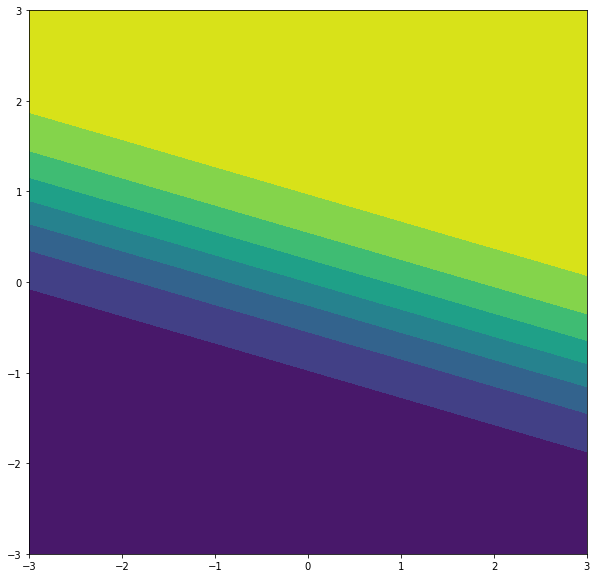

In [69]:
import matplotlib.pyplot as plt 

# initialize range of input values
K = 100
xs = np.linspace(-3, 3, K)
x1s, x2s = np.meshgrid(xs, xs)

# zip the inputs up into a (K*K, 2) array
print(x1s.flatten())
print(x2s.flatten())
X = np.vstack((x1s.flatten(), x2s.flatten())).T

# apply neuron
w = np.array([0.3, 1])

# for each input x_i, compute the dot product between
# x_i and w (this is the weighted sum) 
# since inputs are rows, we need to sum across the columns,
# hence axis=1
wsum = b + np.sum(X * w, axis=1) # wsum is now (K*K,)
outputs = np.tanh(wsum)

Z = np.reshape(outputs, (K, K))

f, ax = plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(x1s, x2s, Z)

### Exercises

1. Change the neuron's weights and see what happens to previous Figure.
2. Try the linear and ReLU activation functions and see what happens in the previous Figure.

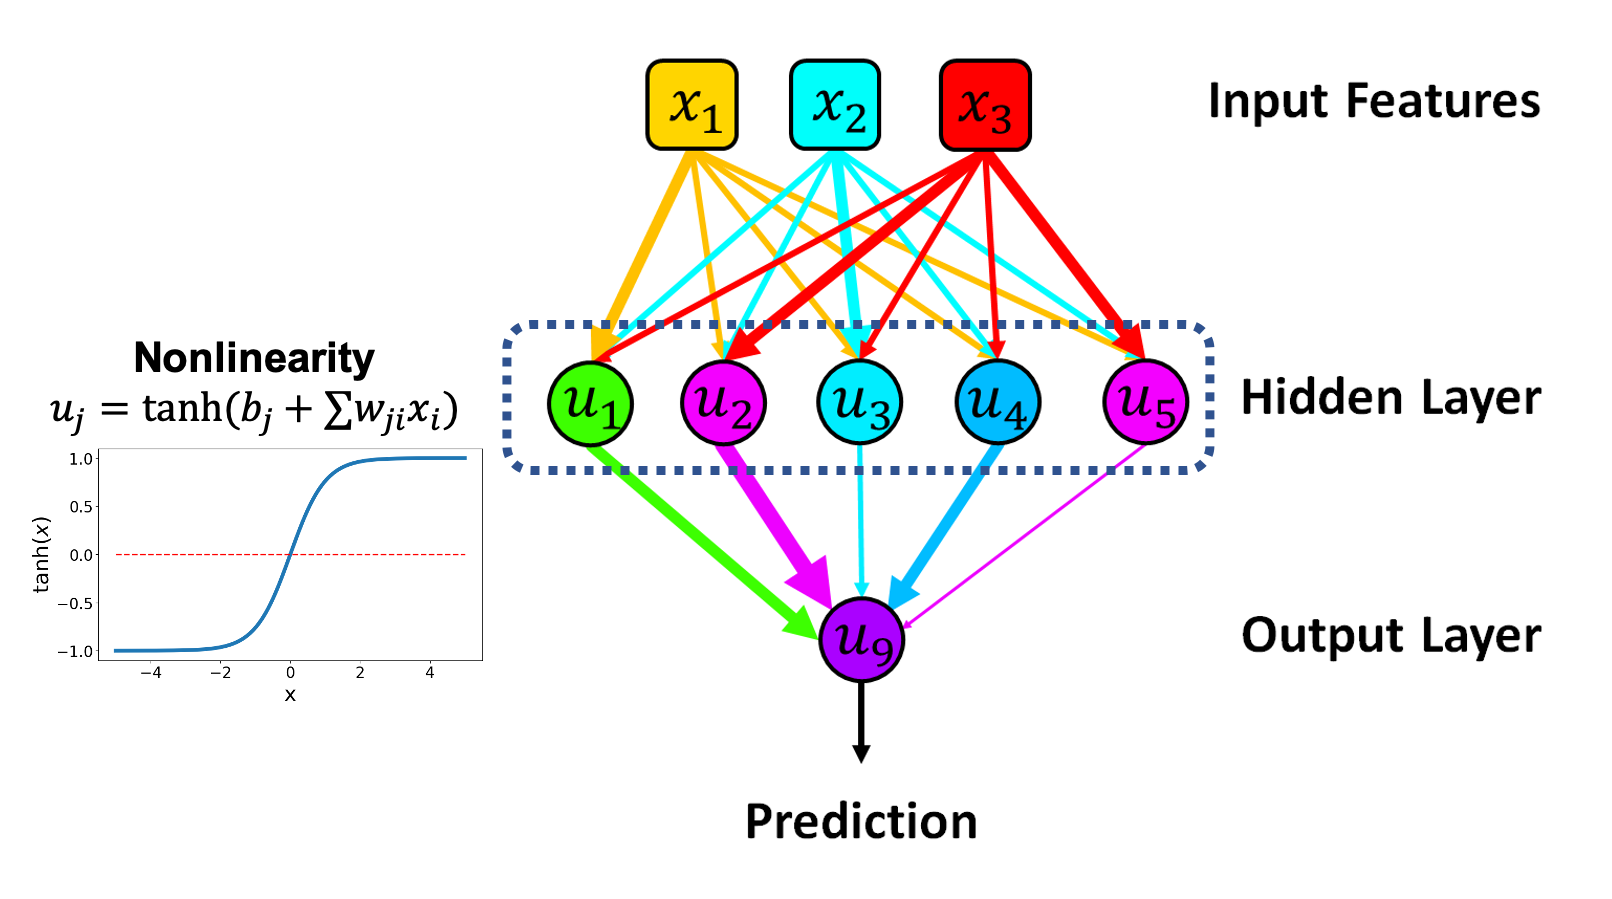## Multiple Neurons

* Neural nets really flex their muscles when they have multiple neurons.
* A typical NN architecture consists of input features, a hidden layer with multiple neurons, and an output layer,  as shown below

![alt text](figures/neuralnet.png)

Let's implement a neural network with multiple neurons in the hidden layer.

In [77]:
# try varying the number of hidden units and see what happens
n_hidden = 20

# weight matrix from inputs to hidden neurons
W_input_hidden = rng.randn(2, n_hidden)
W_input_hidden

b_hidden = rng.randn(n_hidden)
b_hidden

W_hidden_output = rng.randn(n_hidden, 1)
W_hidden_output.shape

b_output = rng.randn()

# b_hidden a vector of 20 elements
# X has (# of data points, 2)
# W_input_hidden (2, 20)
# (# of data points, 20)

u = b_hidden + np.dot(X, W_input_hidden)

# b_output has shape 1
# u has shape (# of points, 20)
# W has shape (20, 1)
# (# of points, 1)
y = b_output + np.dot(u, W_hidden_output)
y.shape

(10000, 1)

(10000, 20)
(10000, 1)


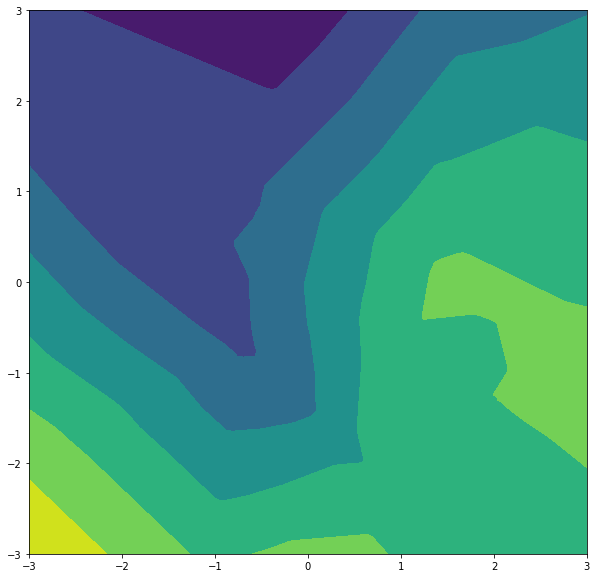

In [89]:
# try varying the number of hidden units and see what happens
n_hidden = 20

# weight matrix from inputs to hidden neurons
W_input_hidden = rng.randn(2, n_hidden)

# bias of the hidden neurons
b_hidden = rng.randn(n_hidden)

# weight matrix from hidden neurons to output
W_hidden_output = rng.randn(n_hidden, 1)

# bias of the output neuron
b_output = rng.randn()

# compute hidden activation
u = np.maximum(0, b_hidden + np.dot(X, W_input_hidden))
print(u.shape)

# compute output
y = b_output + np.dot(u, W_hidden_output)
print(y.shape)

# plot
Z = np.reshape(y, (K, K))
f, ax = plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(x1s, x2s, Z)

* We see that as you increase the number of hidden units, the complexity of the functions that the network can learn increases

### Exercises

1. Try 1, 2, 20 hidden units
2. Try linear and ReLU activation functions

## Learning

* We now demonstrate how to apply a neural network to our fake datasest.
* We will use Tensorflow to do gradient descent (thankfully!)

In [90]:
a1 = ['a', 'b', 'c']
a2 = [1,2,3]
list(zip(a1, a2))

[('a', 1), ('b', 2), ('c', 3)]

In [94]:
X.shape

TensorShape([30, 1])

Final MSE: 1.4372


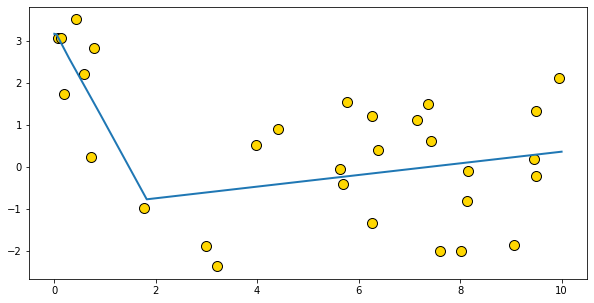

In [116]:
# try varying the number of hidden units and learning rates
n_hidden = 20
eta = 0.03

# read data
data = np.load('data/fake_data.npz')
X, y = data['X'], data['y']

# move data to tensorflow space
X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

# randomly initialize model parameters
W_input_hidden = tf.Variable(rng.randn(X.shape[1], n_hidden), dtype=tf.float32) 
W_hidden_output = tf.Variable(rng.randn(n_hidden, 1), dtype=tf.float32)
b_hidden = tf.Variable(rng.randn(n_hidden), dtype=tf.float32)
b_output = tf.Variable(rng.randn(1), dtype=tf.float32)
variables = [W_input_hidden, W_hidden_output, b_hidden, b_output]

# create optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=eta)

# repeat N times
N = 200
for i in range(N):
    
    with tf.GradientTape() as gt:
        
        # forward computation
        hidden_activation = tf.maximum(0, b_hidden + tf.matmul(X, W_input_hidden))
        ypred = b_output + tf.matmul(hidden_activation, W_hidden_output)
        
        # loss
        mse_loss = tf.reduce_mean(tf.square(ypred - y))
        
    # compute gradient of loss with respect to parameters
    # calculus NOT required!
    gradients = gt.gradient(mse_loss, variables)
    
    # update the parameters
    # this takes a list where each element is a tuple
    # of (gradient, corresponding parameter)
    optimizer.apply_gradients(zip(gradients, variables))
    
# report results
hidden_activation = tf.maximum(0, b_hidden + tf.matmul(X, W_input_hidden))
ypred = b_output + tf.matmul(hidden_activation, W_hidden_output)      
mse_loss = tf.reduce_mean(tf.square(ypred - y))
print("Final MSE: %0.4f" % mse_loss.numpy())

# plot resulting function

# we're plotting a range of values from 0 to 10
xstar = np.linspace(0, 10, 1000)[:,np.newaxis]

# convert xstar to tensorflow
xstar_tf = tf.convert_to_tensor(xstar, dtype=tf.float32)

# run the forward pass to compute the prediction
hidden_activation = tf.maximum(0, b_hidden + tf.matmul(xstar_tf, W_input_hidden))
ypred = b_output + tf.matmul(hidden_activation, W_hidden_output)     

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data['X'], data['y'], 'o', color='gold', markersize=10, 
        markeredgewidth=1, markeredgecolor='black')
ax.plot(xstar, ypred.numpy(), linewidth=2)


### Exercises

1. Vary the number of hidden units: 1, 2, 20
2. Vary the learning rates: 0.01, 0.1, 1
3. Try linear and ReLU hidden activations

## Recap

* A neural network consists of a collection of neurons, each applying a (non-)linear function to the weighted sum of its inputs
* The weights are the free parameters of the network (the things that the machine learns)
* A neural network can consist of multiple layers. For example, input, hidden 1, hidden 2, output.
* Units in each hidden and output layer have an activation function and a set of weights.
* More units => more complex and powerful network but that will come at a cost as we'll see later